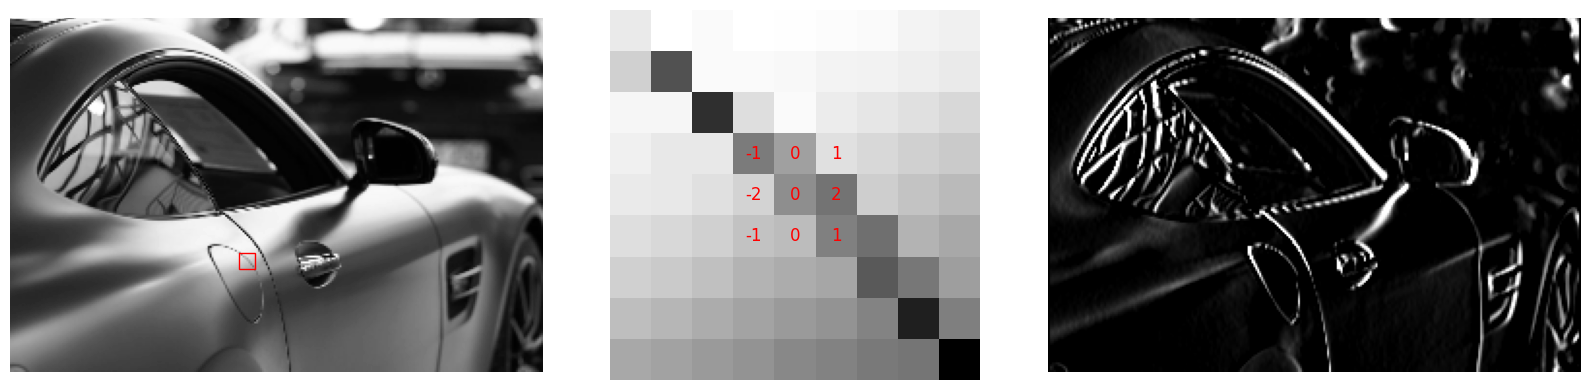

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Define the Sobel filter kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Load an image
image = cv2.imread('grey-car.jpg', cv2.IMREAD_GRAYSCALE)

# scale down the resolution by 4 times
image = cv2.resize(image, (image.shape[1] // 4, image.shape[0] // 4))

# Perform convolution with Sobel filters
sobel_x_output = cv2.filter2D(image, -1, sobel_x)
sobel_y_output = cv2.filter2D(image, -1, sobel_y)

center_y, center_x = 122, 125
padding_for_viewing = 4


# Plot the raw input image
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(image, cmap='gray')

rect = patches.Rectangle((center_y - padding_for_viewing, center_x - padding_for_viewing), 
                         2*padding_for_viewing, 2*padding_for_viewing, 
                         linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)
# plt.title('Raw Input Image')

# Plot the overlay of Sobel filter on a specific patch of the image
patch = image[center_x - padding_for_viewing - 1:center_x + padding_for_viewing, 
              center_y - padding_for_viewing - 1:center_y + padding_for_viewing]  # Choose a 3x3 patch of the image
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(patch, cmap='gray')

for i in range(3):
    for j in range(3):
        plt.text(padding_for_viewing // 2 + 1 + j, padding_for_viewing // 2 + 1 + i, str(sobel_x[i, j]), color='red', fontsize=12, ha='center', va='center')
# plt.title('Overlay of Sobel Filter on Patch')

# Plot the entire image as the product of the convolution
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(sobel_x_output, cmap='gray')
# plt.title('Convolution with Sobel X Filter')

plt.tight_layout()
plt.show()
